Crop image

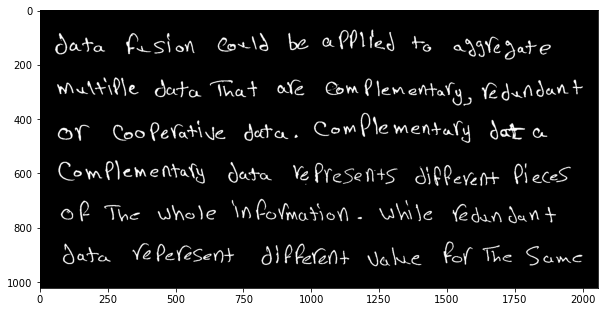

In [3]:
import cv2
import functools
import matplotlib.pyplot as plt

# Opens a image in RGB mode 
image = cv2.imread("..\\Data_split\\train\\Males\\M1.jpg") 
image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
height, width = image.shape
img = cv2.GaussianBlur(image, (9, 9), 0) #decrease noise for dialation
img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 101, 30)
image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 101, 30)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 20))
img = cv2.dilate(img, kernel, iterations=8)
contours = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0] 
biggest_contour = functools.reduce(lambda c1, c2: c1 if cv2.contourArea(c1) > cv2.contourArea(c2) else c2,contours) #find the biggest contour for text area
x, y, w, h = cv2.boundingRect(biggest_contour) # find smallest rect that can contain the text area after dialation
image = image[y:y + h, x:x + w]

fig = plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.show()
